# Visualizing Book Data in MatPlotLib

## This Notebook Covers...

- Accessing Financial Statement data using Yahoo Finance
- Cleaning the Pandas Dataframes to filter for the data we want
- Graphing the data using MatPlotLib to show movement over time

## Imports and Configs

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
symbol = 'AMD'

end_dt = dt.datetime.today()
start_dt = end_dt - dt.timedelta(days=30)

mpl_style = 'Solarize_Light2'
plt.style.use(mpl_style)

## Stock Data

In [4]:
s = yf.Ticker(symbol)

s_is = s.income_stmt # Yearly Income Statements
s_bs = s.balance_sheet # Yearly Balance Sheets
s_cf = s.cash_flow # Yearly Statements of Cash Flows

s_q_is = s.quarterly_income_stmt # Quarterly Income Statements
s_q_bs = s.quarterly_balance_sheet # Quarterly Balance Sheets
s_q_cf = s.quarterly_cash_flow # # Quarterly Statements of Cashflows

## Graphing the Book Data

In FIN 3210, we learned that Net Income, Free Cash Flow, Cash Flow from Operations and Cash Flow from Investing Activities are important, therefore I will graph these first.

### Cleaning the Data

In [5]:
# Net Income
net_income = s_is.filter(like='Net Income', axis=0)
net_income = net_income.T
net_income['Total_Net_Income'] = net_income.sum(axis=1)

tot_net_income = net_income.filter(like='Total_Net_Income')

net_income_q = s_q_is.filter(like='Net Income', axis=0)
net_income_q = net_income_q.T
net_income_q['Total_Net_Income'] = net_income_q.sum(axis=1)

tot_net_income_q = net_income_q.filter(like='Total_Net_Income')

# Free Cash Flow
free_cash_flow = s_cf.iloc[[0]].T
free_cash_flow_quarterly = s_q_cf.iloc[[0]].T

# Cash Flow from Operations
cf_op = s_cf.filter(like='Cash Flow From Continuing Operating Activities', axis=0)
cf_op = cf_op.T

cf_op_q = s_q_cf.filter(like='Cash Flow From Continuing Operating Activities', axis=0)
cf_op_q = cf_op_q.T

# Cash Flow from Investing Activities
cf_inv = s_cf.filter(like='Cash Flow From Continuing Investing Activities', axis=0)
cf_inv = cf_inv.T

cf_inv_q = s_q_cf.filter(like='Cash Flow From Continuing Investing Activities', axis=0)
cf_inv_q = cf_inv_q.T


### Graphing Net Income - Yearly

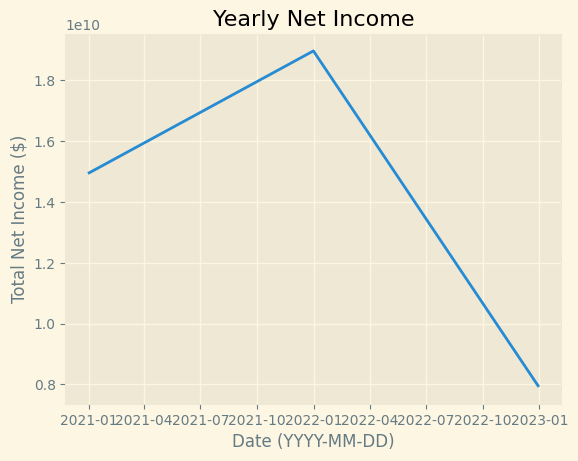

In [6]:
xdata = tot_net_income.index
ydata = tot_net_income['Total_Net_Income']

plt.xlabel('Date (YYYY-MM-DD)')
plt.ylabel('Total Net Income ($)')
plt.title('Yearly Net Income')


plt.plot(xdata, ydata)
plt.show()

### Graphing Net Income - Quarterly

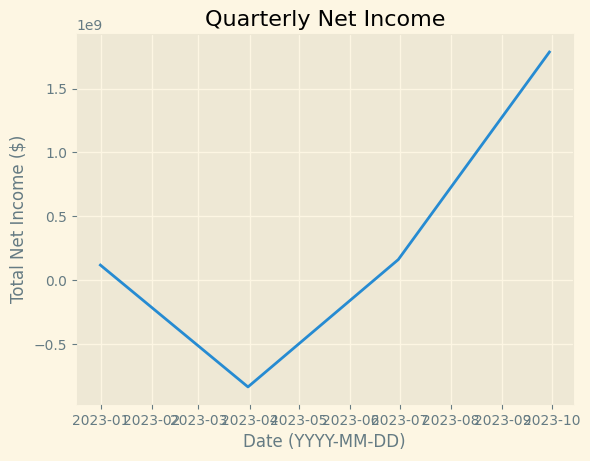

In [7]:
xdata = tot_net_income_q.index
ydata = tot_net_income_q['Total_Net_Income']

plt.xlabel('Date (YYYY-MM-DD)')
plt.ylabel('Total Net Income ($)')
plt.title('Quarterly Net Income')


plt.plot(xdata, ydata)
plt.show()

### Graphing Free Cash Flow - Yearly

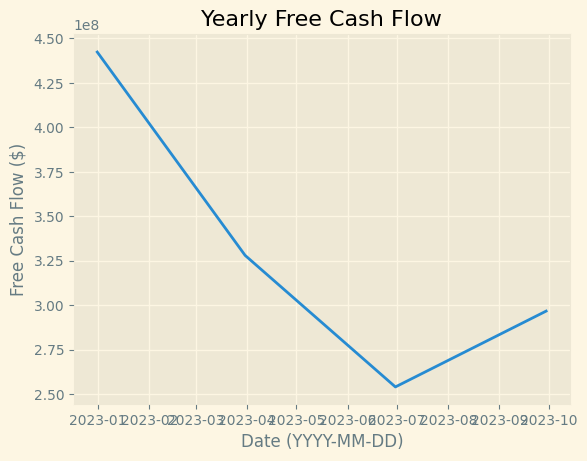

In [8]:
xdata = free_cash_flow_quarterly.index
ydata = free_cash_flow_quarterly['Free Cash Flow']

plt.xlabel('Date (YYYY-MM-DD)')
plt.ylabel('Free Cash Flow ($)')
plt.title('Yearly Free Cash Flow')

plt.plot(xdata, ydata)
plt.show()

### Graphing Free Cash Flow - Quarterly

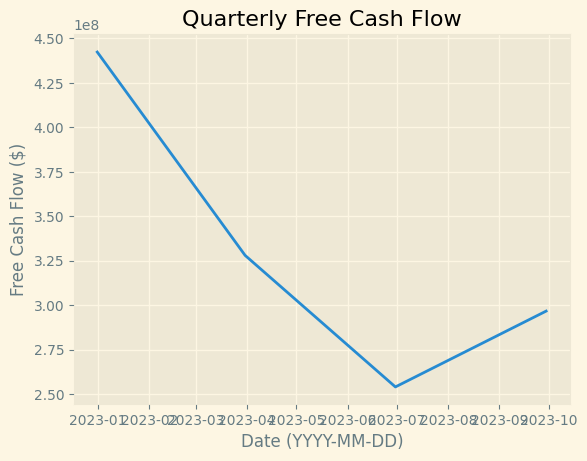

In [11]:
xdata = free_cash_flow_quarterly.index
ydata = free_cash_flow_quarterly['Free Cash Flow']

plt.xlabel('Date (YYYY-MM-DD)')
plt.ylabel('Free Cash Flow ($)')
plt.title('Quarterly Free Cash Flow')

plt.plot(xdata, ydata)
plt.show()

### Graphing Operating Cash Flow - Yearly

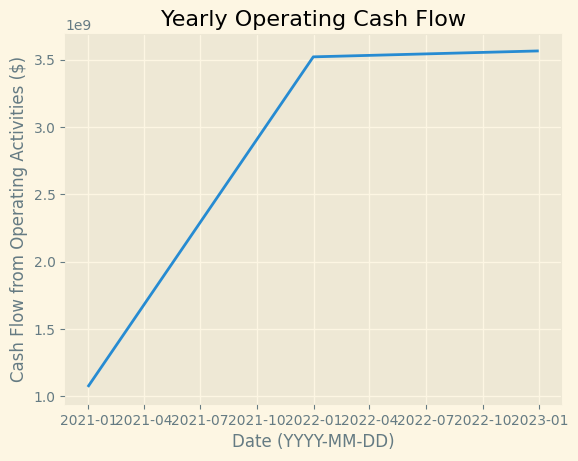

In [14]:
# Yearly: cf_op
# Quarterly: cf_op_q

xdata = cf_op.index
ydata = cf_op['Cash Flow From Continuing Operating Activities']

plt.xlabel('Date (YYYY-MM-DD)')
plt.ylabel('Cash Flow from Operating Activities ($)')
plt.title('Yearly Operating Cash Flow')

plt.plot(xdata, ydata)
plt.show()

### Graphing Operating Cash Flow - Quarterly

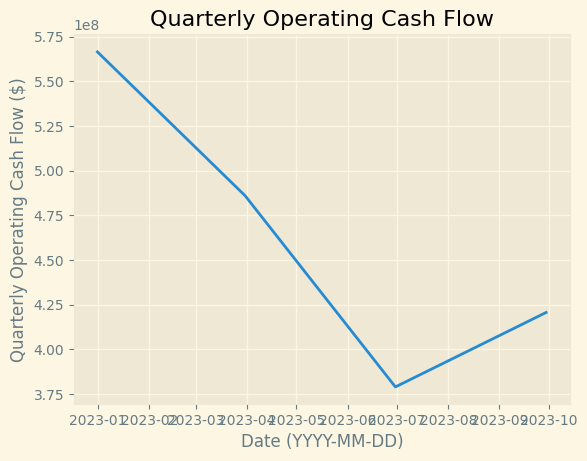

In [17]:
xdata = cf_op_q.index
ydata = cf_op_q['Cash Flow From Continuing Operating Activities']

plt.xlabel('Date (YYYY-MM-DD)')
plt.ylabel('Quarterly Operating Cash Flow ($)')
plt.title('Quarterly Operating Cash Flow')

plt.plot(xdata, ydata)
plt.show()

### Graphing Investing Cash Flow - Yearly

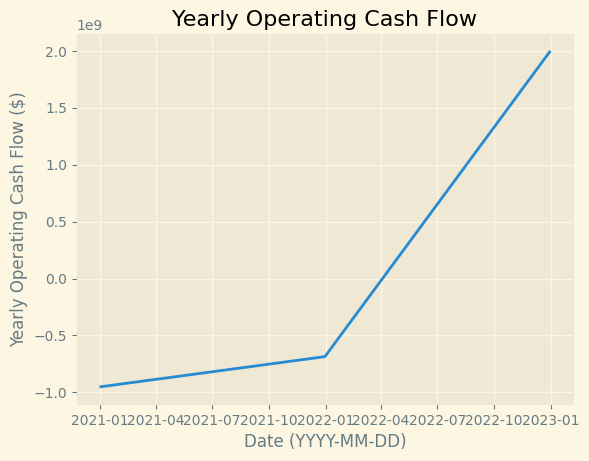

In [18]:
xdata = cf_inv.index
ydata = cf_inv['Cash Flow From Continuing Investing Activities']

plt.xlabel('Date (YYYY-MM-DD)')
plt.ylabel('Yearly Operating Cash Flow ($)')
plt.title('Yearly Operating Cash Flow')

plt.plot(xdata, ydata)
plt.show()

### Graphing Investing Cash Flow - Quarterly

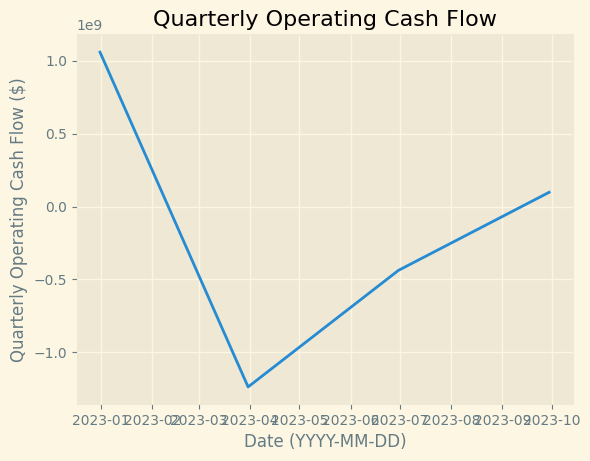

In [20]:
xdata = cf_inv_q.index
ydata = cf_inv_q['Cash Flow From Continuing Investing Activities']

plt.xlabel('Date (YYYY-MM-DD)')
plt.ylabel('Quarterly Operating Cash Flow ($)')
plt.title('Quarterly Operating Cash Flow')

plt.plot(xdata, ydata)
plt.show()